<a href="https://colab.research.google.com/github/DharmeshPatel33/Yolo-FOOD-Detection/blob/main/Final_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required libraries
!pip install tensorflow-gpu==1.15.0rc2
!pip install imageio

# Download and build darkflow (the tensorflow implementation of YOLO)
import os
import pathlib

if "darkflow-master" in pathlib.Path.cwd().parts:
  while "darkflow-master" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path("darkflow-master").exists():
  !git clone --depth 1 https://github.com/thtrieu/darkflow.git
  # Compile darkflow
  %cd darkflow
  !python setup.py build_ext --inplace
  # Change darkflow to darkflow-master to distinguish between folder names
  %cd ../
  !mv darkflow darkflow-master
  %cd darkflow-master

# Upload yolo.weights, pre-trained weights file (for YOLO v2) from an external Google drive 
weights = 'yolo'
weights_file = weights + '.weights'
if not os.path.exists('weights_file'):
  !gdown --id 0B1tW_VtY7oniTnBYYWdqSHNGSUU
  !mkdir bin
  !mv yolo.weights bin

# Imports
%cd darkflow-master
%tensorflow_version 1.15.0rc2

# For importing/exporting files, working with arrays, etc
import time
import urllib
import numpy as np
import pandas as pd
import imageio

# For actual object detection
import tensorflow as tf
from darkflow.net.build import TFNet
threshold = 0.25

# For drawing onto and plotting images
import matplotlib.pyplot as plt
import cv2
%config InlineBackend.figure_format = 'svg'

     |████████████████████████████████| 411.5MB 40kB/s 
     |████████████████████████████████| 512kB 38.8MB/s 
     |████████████████████████████████| 3.8MB 37.6MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=5490e150ddd5457f2a7ae4e6f21749f6d6f0b442944b6ed30783ec1319e2312b
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.4.1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorboard~=2.4, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.4.1 has requirement tensorflow-estimator<2.5.0,>=2.4.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing instal

In [3]:
# For drawing bounding boxes around detected objects on image
def boxing(image, predictions):
    newImage = np.copy(image)
    im_height, im_width, im_depth = image.shape  
    global labels
    labels = []
    for result in predictions:
      # Only show boxes that are above confidence threshold
      confidence = result['confidence']
      if confidence > threshold:
        xmin = result['topleft']['x']
        ymin = result['topleft']['y']
        xmax = result['bottomright']['x']
        ymax = result['bottomright']['y']
        #global label
        label = result['label'] + " " + str(round(confidence, 2))
        labels.append(label)
        # Draw boxes on image
        fontScale = max(im_width,im_height)/500
        fontThickness = int(max(im_width,im_height)/200)
        newImage = cv2.rectangle(newImage, (xmin, ymax), (xmax, ymin), (255, 0, 157), 3)
        newImage = cv2.putText(newImage, label, (xmin, ymax-5), cv2.FONT_HERSHEY_SIMPLEX, fontScale, (0, 0, 0), fontThickness*2, cv2.LINE_AA) 
        newImage = cv2.putText(newImage, label, (xmin, ymax-5), cv2.FONT_HERSHEY_SIMPLEX, fontScale, (255, 255, 255), fontThickness, cv2.LINE_AA)  
    return newImage

In [4]:
# Define parameters for feeding images through the model
# detection confidence threshold here
threshold = 0.1
params = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo.weights',
    'threshold': threshold, 
    'gpu': 1.0
}

# Run the model
tfnet = TFNet(params)



Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.022513389587402344s
Model has a coco model name, loading coco labels.

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)

 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |

In [5]:
!ls '/content/drive/My Drive/Food_Images/test1'

AnyConv.com__285A5419.jpeg
AnyConv.com__93081945cca7fbe8606c3770f07b9128.jpeg
AnyConv.com__943cf1998632f0f1dd8caa39ca2777e2.jpeg
AnyConv.com__BA-Perfect-Pizza.jpeg
AnyConv.com__fish-dish-1.jpeg
AnyConv.com__ground-chicken-burgers-1.jpeg
AnyConv.com__high-protein-grillable-vegan-burgers-with-seitan-tvp-38.jpeg
AnyConv.com__HLY_Lentil_Burger_Horizontal.jpeg
AnyConv.com__OLI-1018_Everyday-PanFriedCodWithGiantBeanChard_28546-acc2f54.jpeg
AnyConv.com__plain_pizza_f431dcc55520ce41f835a97a5383f171.jpeg
AnyConv.com__Smashburger-recipe-120219.jpeg


In [6]:
Names=[
'AnyConv.com__285A5419.jpeg',
'AnyConv.com__93081945cca7fbe8606c3770f07b9128.jpeg',
'AnyConv.com__943cf1998632f0f1dd8caa39ca2777e2.jpeg',
'AnyConv.com__BA-Perfect-Pizza.jpeg',
'AnyConv.com__fish-dish-1.jpeg',
'AnyConv.com__ground-chicken-burgers-1.jpeg',
'AnyConv.com__high-protein-grillable-vegan-burgers-with-seitan-tvp-38.jpeg',
'AnyConv.com__HLY_Lentil_Burger_Horizontal.jpeg',
'AnyConv.com__OLI-1018_Everyday-PanFriedCodWithGiantBeanChard_28546-acc2f54.jpeg',
'AnyConv.com__plain_pizza_f431dcc55520ce41f835a97a5383f171.jpeg',
'AnyConv.com__Smashburger-recipe-120219.jpeg'
]

In [7]:
def predict():
  for Name in Names:
    url='/content/drive/My Drive/Food_Images/test1/'+Name
    image = imageio.imread(url, pilmode='RGB')
    
    result = tfnet.return_predict(image)
    _, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(boxing(image, result))
    # Add titles to plot
    if result and labels:
      plt.title('Class Found')
    else:
      plt.title("No class found for this image")

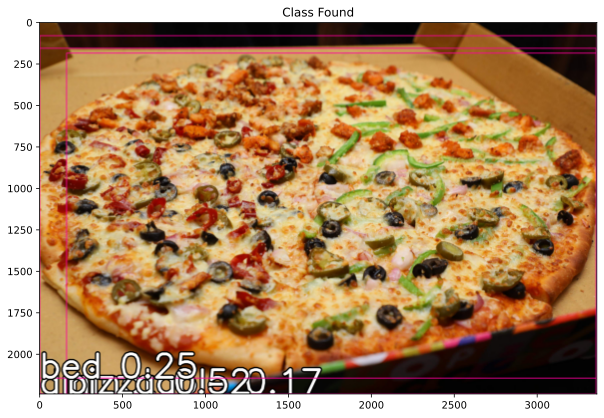

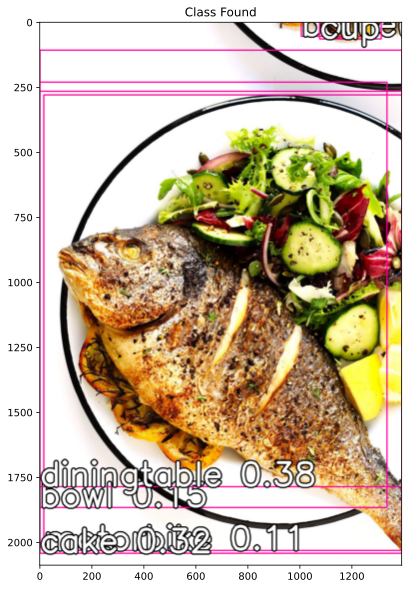

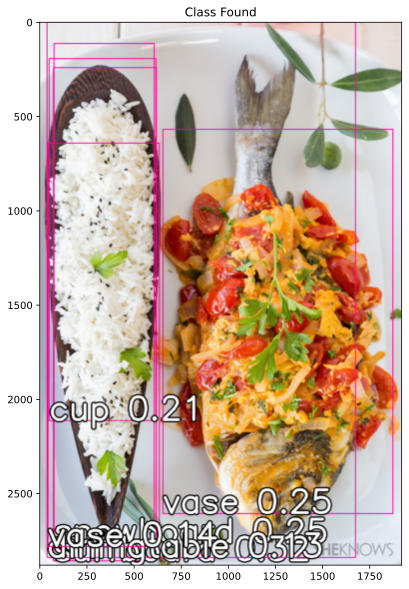

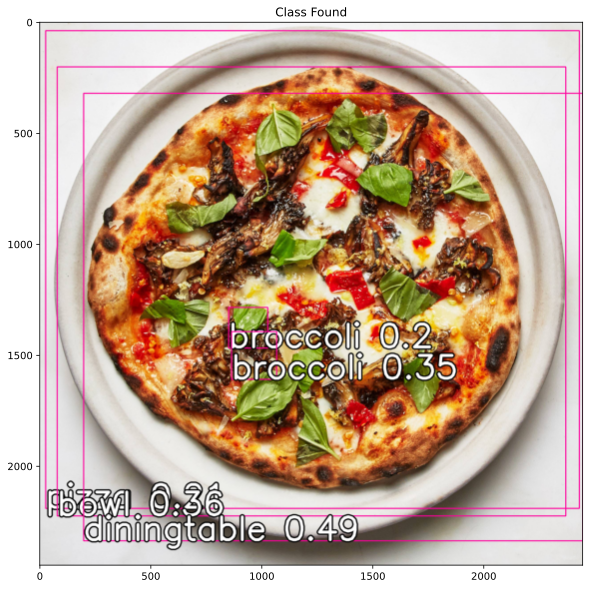

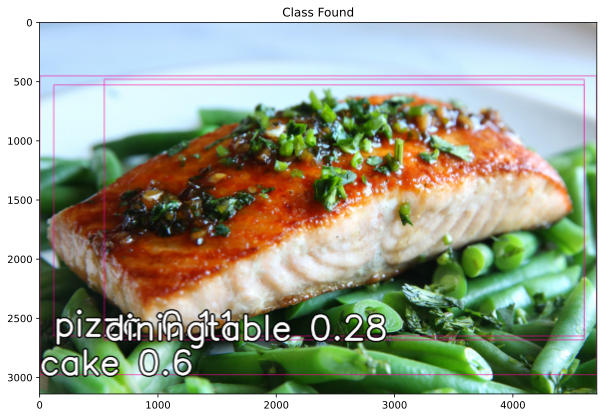

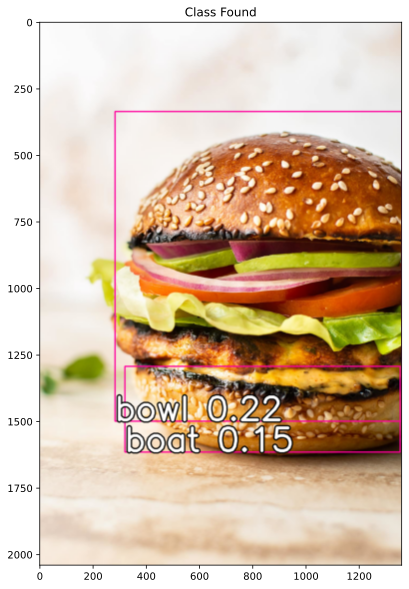

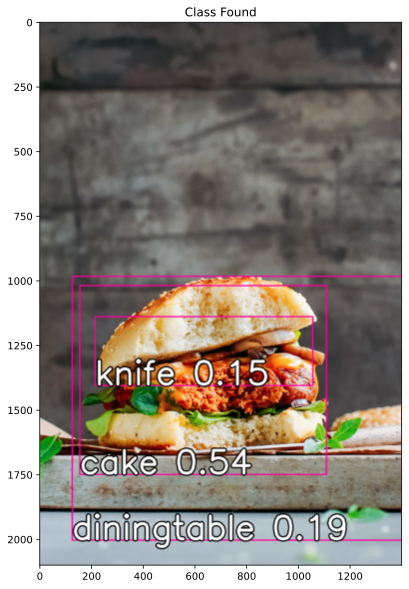

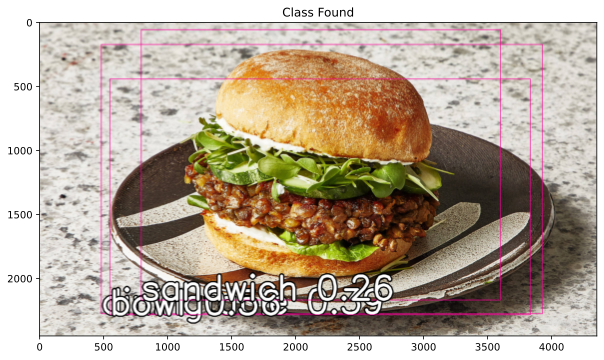

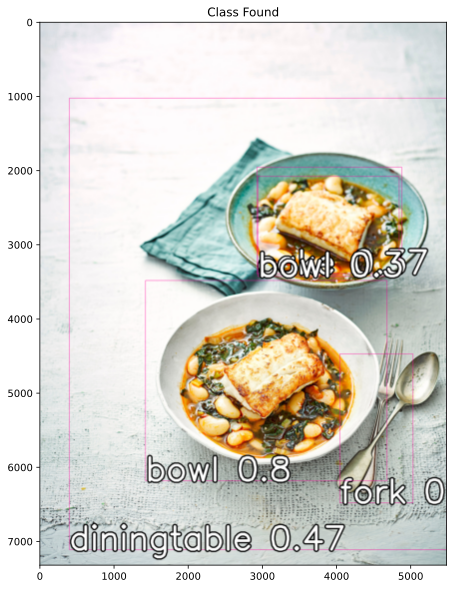

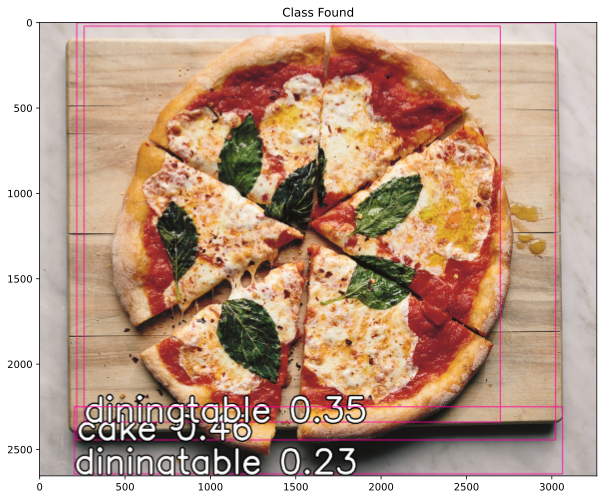

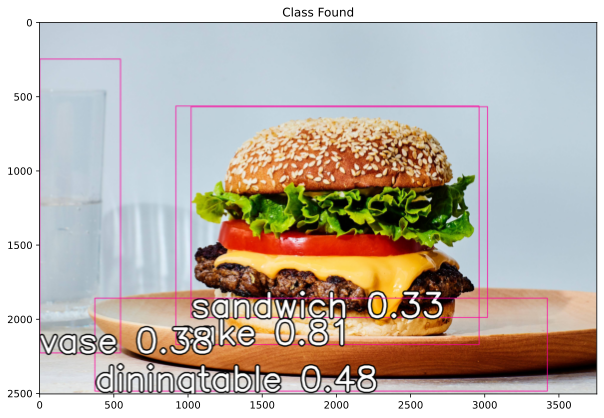

In [8]:
predict()